# ✨ TF-IDF (Term Frequency–Inverse Document Frequency) in NLP

## 📖 What is TF-IDF?

**TF-IDF** is a statistical measure used in Natural Language Processing to evaluate how important a word is to a document **relative to a collection (corpus)**.

It combines two components:

- **TF**: Term Frequency
- **IDF**: Inverse Document Frequency

The intuition is:
- Words that appear **frequently in a document** are important (TF)
- But words that appear in **many documents** (like "the", "is") are less informative (IDF)

---

## TF: Term Frequency

The **term frequency** is the number of times a word appears in a document, normalized by the total number of words in the document.

For a word $w$ in document $d$:

$$
\text{TF}(w, d) = \frac{f_{w,d}}{\sum_{k} f_{k,d}}
$$

Where:
- $f_{w,d}$ is the number of times word $w$ appears in document $d$
- The denominator is the total number of words in $d$

---

## IDF: Inverse Document Frequency

The **inverse document frequency** downscales words that appear in many documents. It measures the **rarity** of a word.

For a word $w$ in a corpus $D$:

$$
\text{IDF}(w, D) = \log\left(\frac{N}{1 + \text{df}(w)}\right)
$$

Where:
- $N$ is the total number of documents in the corpus
- $\text{df}(w)$ is the number of documents containing the word $w$
- $1$ is added to avoid division by zero

---

## TF-IDF Formula

Combining TF and IDF:

$$
\text{TF-IDF}(w, d, D) = \text{TF}(w, d) \times \text{IDF}(w, D)
$$

This product gives a **weighted score** for each word in each document.

---

## 🔍 Example

Suppose the word `"machine"` appears:
- 5 times in document $d$
- In 100 documents out of 10,000 in the corpus

Then:
- $\text{TF}(\text{"machine"}, d) = \frac{5}{\text{length of } d}$
- $\text{IDF}(\text{"machine"}, D) = \log\left(\frac{10000}{1 + 100}\right)$

---

## Why Use TF-IDF?

- Reduces the impact of **frequent but less informative words** (e.g., "and", "the")
- Highlights **discriminative words** for a given document
- Works well in:
  - Document classification
  - Text similarity
  - Search and retrieval

---

## Summary

| Component | Description                         |
|-----------|-------------------------------------|
| **TF**    | Local importance (in the document)  |
| **IDF**   | Global rarity (across the corpus)   |
| **TF-IDF**| Combined score for weighting terms  |

> 💡 TF-IDF is a classic feature extraction technique in NLP. While not contextual like embeddings, it's fast, interpretable, and very effective for many baseline models.


# ⚖️ TF-IDF vs. Bag of Words in NLP

Both **TF-IDF** and **Bag of Words (BoW)** are fundamental text vectorization techniques used to represent documents numerically. While they are similar in structure, they differ in how they weight terms.

---

## Bag of Words (BoW)

The **Bag of Words** model creates a feature vector by counting the **number of occurrences** of each word in a document.

### Formula:
For term $w$ in document $d$:

$$
\text{BoW}(w, d) = f_{w,d}
$$

Where $f_{w,d}$ is the frequency of word $w$ in document $d$.

---

## ✨ TF-IDF: Term Frequency–Inverse Document Frequency

The **TF-IDF** model weights each word based on its **term frequency in a document** and **inverse frequency across all documents**.

### Formula:

$$
\text{TF-IDF}(w, d, D) = \text{TF}(w, d) \times \text{IDF}(w, D)
$$

Where:
- $\text{TF}(w, d)$ = frequency of $w$ in $d$ normalized by document length
- $\text{IDF}(w, D)$ = log-scaled inverse frequency of $w$ across all documents in corpus $D$

---

## Comparison Table

| Feature                     | **Bag of Words (BoW)**                        | **TF-IDF**                                     |
|-----------------------------|-----------------------------------------------|------------------------------------------------|
| **Weighting**               | Raw word counts                              | Frequency + uniqueness                        |
| **Common word penalty**     | ❌ No                                         | ✅ Yes (via IDF)                              |
| **Vocabulary size**         | Large and sparse                             | Large and sparse                              |
| **Context awareness**       | ❌ No                                         | ❌ No                                          |
| **Semantic understanding**  | ❌ None                                       | ❌ None                                        |
| **Discriminative power**    | Lower (common words dominate)                | Higher (rare but relevant words emphasized)   |
| **Interpretability**        | ✅ Easy                                       | ✅ Easy (but more nuanced)                    |
| **Computational cost**      | Low                                          | Slightly higher                               |

---

## Advantages of TF-IDF Over BoW

- **Down-weights common words** (like "the", "is", "and") that appear in almost every document
- **Highlights rare but important terms** that help distinguish documents
- **Improves performance** in many tasks like:
  - Text classification
  - Document similarity
  - Information retrieval

---

## Disadvantages of TF-IDF

- Still **ignores word order** and **semantic meaning**
- **Cannot handle polysemy** or **contextual variations**
- **Sparse vectors**: Like BoW, it produces high-dimensional sparse vectors
- **Not dynamic**: Once built, TF-IDF weights are fixed unless re-trained

---

## Summary

| Technique | When to Use                             |
|-----------|------------------------------------------|
| **BoW**   | Simple models, small corpora, prototyping |
| **TF-IDF**| When discriminative weighting matters, e.g., classification, search |

> 💡 Use TF-IDF when you want a **better signal-to-noise ratio** than raw counts, but don't need contextual understanding like with BERT or Word2Vec.


In [ ]:
!pip install nltk

In [ ]:
# Re-import after kernel reset
import pandas as pd
import nltk # Import nltk before downloading
nltk.download('stopwords') # Download stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordlemmatize=WordNetLemmatizer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=["label", "message"])


In [ ]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()
    # Lemmatize words, excluding stopwords
    review = [wordlemmatize.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


In [ ]:
# corpus

## Create TF-IDF And NGrams

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(max_features=100)
X = tfidf.fit_transform(corpus).toarray()

In [ ]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))

In [ ]:
# X

In [ ]:
tfidf=TfidfVectorizer(max_features=100,ngram_range=(2,2))
X=tfidf.fit_transform(corpus).toarray()

In [ ]:
tfidf.vocabulary_

{'free entry': np.int64(31),
 'claim call': np.int64(15),
 'call claim': np.int64(3),
 'free call': np.int64(30),
 'chance win': np.int64(14),
 'txt word': np.int64(89),
 'let know': np.int64(52),
 'mobile free': np.int64(57),
 'please call': np.int64(67),
 'lt gt': np.int64(56),
 'want go': np.int64(97),
 'like lt': np.int64(53),
 'sorry call': np.int64(80),
 'call later': np.int64(8),
 'ur awarded': np.int64(90),
 'hi hi': np.int64(45),
 'call customer': np.int64(4),
 'customer service': np.int64(22),
 'guaranteed cash': np.int64(41),
 'cash prize': np.int64(13),
 'po box': np.int64(69),
 'trying contact': np.int64(86),
 'draw show': np.int64(27),
 'show prize': np.int64(79),
 'prize guaranteed': np.int64(73),
 'guaranteed call': np.int64(40),
 'valid hr': np.int64(95),
 'selected receive': np.int64(76),
 'private account': np.int64(71),
 'account statement': np.int64(0),
 'statement show': np.int64(81),
 'call identifier': np.int64(5),
 'identifier code': np.int64(48),
 'code expire

In [ ]:
# X

In [ ]:

# Load SMS dataset
df = pd.read_csv("SMSSpamCollection.txt", sep="\t", header=None, names=["label", "message"])
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Define a simple tokenizer to mimic lemmatization (due to environment limitations)
def mock_lemmatize(text):
    return re.findall(r'\b[a-z]+\b', text.lower())

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label_num'], test_size=0.2, random_state=42)

# TF-IDF pipeline (with bigrams)
tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=mock_lemmatize, ngram_range=(1, 2))),
    ('clf', MultinomialNB())
])
tfidf_pipeline.fit(X_train, y_train)
y_pred_tfidf = tfidf_pipeline.predict(X_test)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Bag of Words pipeline
bow_pipeline = Pipeline([
    ('bow', CountVectorizer(tokenizer=mock_lemmatize)),
    ('clf', MultinomialNB())
])
bow_pipeline.fit(X_train, y_train)
y_pred_bow = bow_pipeline.predict(X_test)
accuracy_bow = accuracy_score(y_test, y_pred_bow)

accuracy_tfidf, accuracy_bow


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(0.9533632286995516, 0.9901345291479821)

Bag of Words outperformed the TF-IDF + n-gram model in this case.

This could be due to:

Simpler models sometimes working better for short, domain-specific messages.

TF-IDF down-weighting frequent but informative terms in a small dataset.

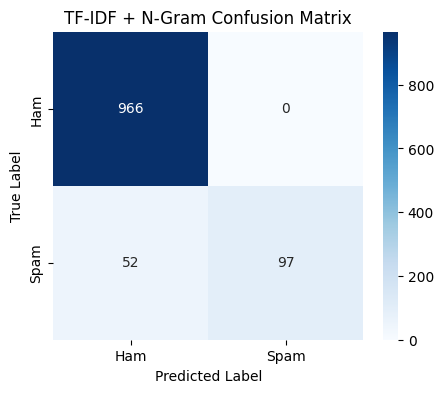

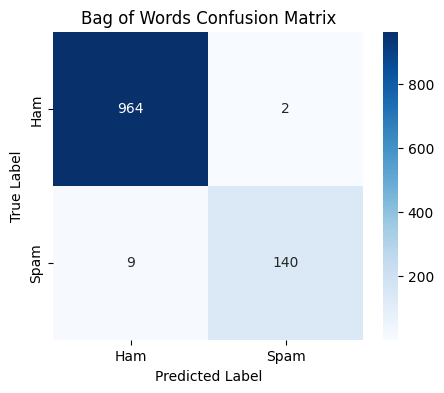

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)
conf_matrix_bow = confusion_matrix(y_test, y_pred_bow)

# Plotting function
def plot_conf_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=["Ham", "Spam"],
                yticklabels=["Ham", "Spam"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Visualize both confusion matrices
plot_conf_matrix(conf_matrix_tfidf, "TF-IDF + N-Gram Confusion Matrix")
plot_conf_matrix(conf_matrix_bow, "Bag of Words Confusion Matrix")


📊 TF-IDF + N-Gram Model
Slightly more misclassifications (especially false negatives: spam misclassified as ham)

📊 Bag of Words Model
Fewer misclassifications

Stronger performance across both classes, especially in identifying spam correctly

In [ ]:
from sklearn.metrics import classification_report

# Classification reports
report_tfidf = classification_report(y_test, y_pred_tfidf, target_names=["Ham", "Spam"], output_dict=True)
report_bow = classification_report(y_test, y_pred_bow, target_names=["Ham", "Spam"], output_dict=True)

# Convert to DataFrames for easier comparison
report_df_tfidf = pd.DataFrame(report_tfidf).transpose()
report_df_bow = pd.DataFrame(report_bow).transpose()

report_df_tfidf, report_df_bow


(              precision    recall  f1-score      support
 Ham            0.948919  1.000000  0.973790   966.000000
 Spam           1.000000  0.651007  0.788618   149.000000
 accuracy       0.953363  0.953363  0.953363     0.953363
 macro avg      0.974460  0.825503  0.881204  1115.000000
 weighted avg   0.955745  0.953363  0.949045  1115.000000,
               precision    recall  f1-score      support
 Ham            0.990750  0.997930  0.994327   966.000000
 Spam           0.985915  0.939597  0.962199   149.000000
 accuracy       0.990135  0.990135  0.990135     0.990135
 macro avg      0.988333  0.968763  0.978263  1115.000000
 weighted avg   0.990104  0.990135  0.990034  1115.000000)

TF-IDF + N-Gram has perfect precision for spam but low recall → it misses many actual spam messages.

Bag of Words performs better overall, especially in recall and F1-score for spam.

For spam detection, recall is critical to avoid letting spam slip through — BoW wins here.